In [1]:
from  google.colab import drive, files

In [2]:
drive.mount('/content/MyDrive/')

Mounted at /content/MyDrive/


In [3]:
%cd '/content/MyDrive/MyDrive/Liscence_plate/'
print("Driver loaded Successfull")

/content/MyDrive/MyDrive/Liscence_plate
Driver loaded Successfull


#Load OPENCV

In [33]:
import cv2
import imutils
import numpy as np
from google.colab.patches import cv2_imshow

In [34]:
#cascade file
cascade_src = 'haarcascade_russian_plate_number.xml'
car_cascade = cv2.CascadeClassifier(cascade_src)

In [59]:
image='np_5.jpg'

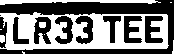

In [65]:
img = cv2.imread(image)
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
nplate = car_cascade.detectMultiScale(gray, 1.1, 4)
for (x,y,w,h) in nplate:
    a, b = (int(.02 * img.shape[0]) , int(.025 * img.shape[1]))
    plate = img[y+a :y+h-a , x+b:x+w-b , :]
    #image processing
    kernal = np.ones((1,1) ,np.uint8)
    plate= cv2.dilate(plate ,kernal ,iterations=1)
    plate= cv2.erode(plate ,kernal ,iterations=1)
    plate_gray = cv2.cvtColor(plate, cv2.COLOR_BGR2GRAY)
    thresh_plate = cv2.threshold(plate_gray , 125 ,255,cv2.THRESH_BINARY)[1]
    cv2_imshow(thresh_plate)
cv2.waitKey(0)
cv2.destroyAllWindows()

#Loading EasyOCR

In [ ]:
!pip install torch torchvision torchaudio

In [ ]:
!pip install easyocr

In [16]:
import easyocr

In [66]:
image_path = thresh_plate

In [67]:
reader = easyocr.Reader(['en'] ,gpu =False)
result = reader.readtext(image_path)

Using CPU. Note: This module is much faster with a GPU.


In [69]:
print(result)

[([[0, 6], [174, 6], [174, 54], [0, 54]], 'LraJTEB', 0.3316392939069698)]
